In [1]:
import yfinance as yf
import datetime as dt
import pandas as pd
import numpy as np
from numpy import arange
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV

[*********************100%***********************]  1 of 1 completed


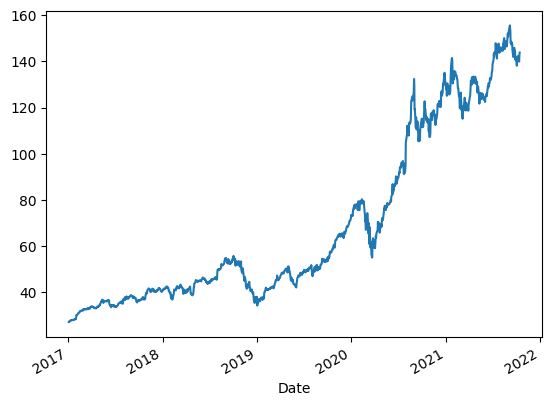

In [50]:
data = yf.download("AAPL", start="2017-01-01", end="2021-10-16")
df = pd.DataFrame(data)

df['Adj Close'].plot()
plt.show()

In [51]:
#df['Date'] = df.index

# split into x and y with date
x = df.drop(['Adj Close'], axis=1)
y = df['Adj Close']

#split data with indexes
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.95, random_state=0)
x_train_dates = x_train.index
x_test_dates = x_test.index

x_train = x_train.values
x_test = x_test.values
y_train = y_train.values
y_test = y_test.values

In [52]:
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)
model = RandomForestRegressor()
grid_rf = {
'n_estimators': [50, 100],  
'max_depth': np.arange(1, 20, 1),  
'min_samples_split': [2, 10, 9], 
'min_samples_leaf': np.arange(1, 15, 2, dtype=int),  
'bootstrap': [True, False], 
'random_state': [1, 2, 30]
}
rscv = RandomizedSearchCV(estimator=model,param_distributions=grid_rf, cv=3, n_jobs=-1, verbose=2, n_iter=150)
rscv_fit = rscv.fit(x_train, y_train)
best_parameters = rscv_fit.best_params_
print(best_parameters)


Fitting 3 folds for each of 150 candidates, totalling 450 fits
{'random_state': 1, 'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 5, 'bootstrap': True}


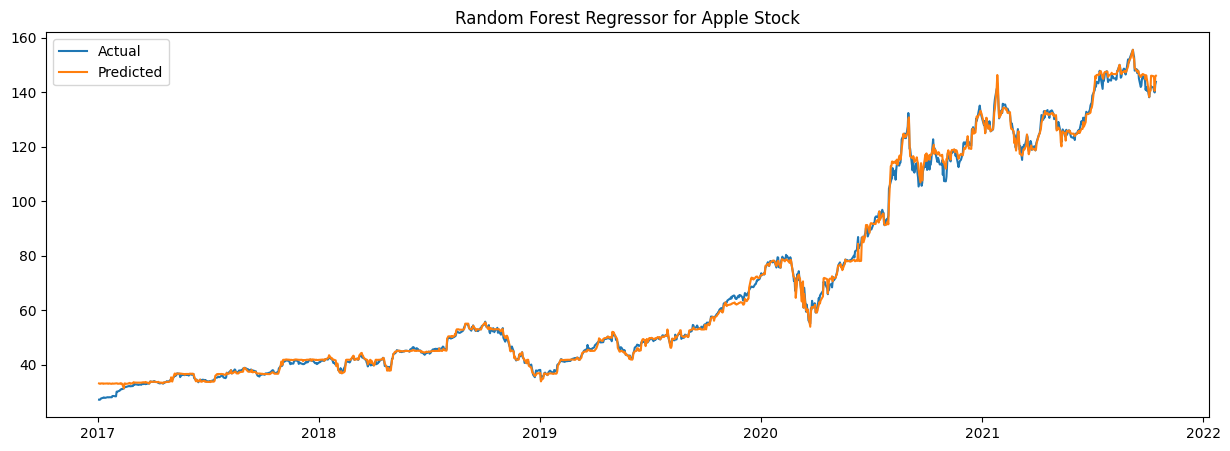

In [55]:
# Predict values
y_pred = rscv_fit.predict(x_test)

#recombine dates with values
y_test = pd.DataFrame(y_test, index=x_test_dates)
y_pred = pd.DataFrame(y_pred, index=x_test_dates)
y_train = pd.DataFrame(y_train, index=x_train_dates)

# combine test and train values with dates as index
y_actual = pd.concat([y_test, y_train])
y_pred = pd.concat([y_pred, y_train])

# Sort by date
y_actual = y_actual.sort_index()
y_pred = y_pred.sort_index()

# Plot the results
plt.figure(figsize=(15, 5))
plt.plot(y_actual, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title('Random Forest Regressor for Apple Stock')
plt.show()




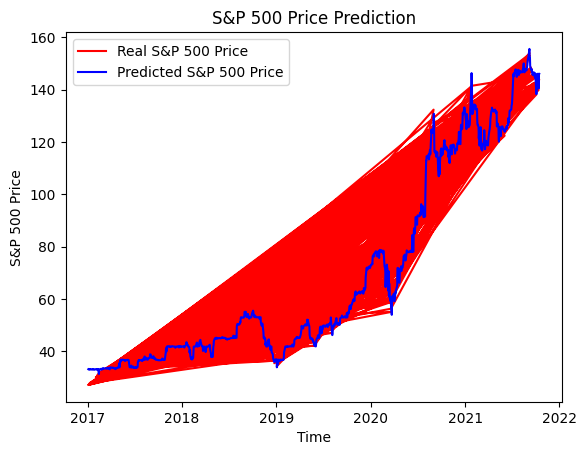

In [54]:
# Output prediction plot
plt.plot(y_test, color='red', label='Real S&P 500 Price')
plt.plot(y_pred, color='blue', label='Predicted S&P 500 Price')
plt.title('S&P 500 Price Prediction')
plt.xlabel('Time')
plt.ylabel('S&P 500 Price')
plt.legend()